<a href="https://colab.research.google.com/github/RoyMassett/Roy_Ava_Clustering_2019/blob/master/notebooks/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading OASIS data and clustering

### Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load dataset as pandas dataframe

In [6]:
OASIS = pd.read_csv('../datasets/OASIS.csv')
OASIS.head()

,Subject,M/F,Hand,YOB,UDS A1: Sub Demos,UDS B6: GDS,UDS B8: Phys. Neuro Findings,Psych Assessments,UDS A2: Informant Demos,UDS B7: FAQs,UDS D1: Clinician Diagnosis,UDS A5: Sub Health Hist.,UDS B2: HIS and CVD,UDS A3: Partcpt Family Hist.,PETs,UDS B3: UPDRS,MR Sessions,UDS B9: Clin. Judgements,ADRC Clinical Data,UDS B5: NPI-Q
0,OAS30001,F,R,NaN,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,7.0,9.0,4,9.0,12,9.0
1,OAS30002,M,R,NaN,8.0,8.0,8.0,7.0,8.0,8.0,8.0,8.0,8.0,8.0,3.0,8.0,4,8.0,8,8.0
2,OAS30003,F,R,NaN,6.0,6.0,6.0,NaN,6.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,6,6.0,8,6.0
3,OAS30004,F,L,NaN,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4,3.0,4,3.0
4,OAS30005,F,R,NaN,3.0,3.0,3.0,NaN,3.0,3.0,3.0,3.0,3.0,3.0,5.0,3.0,6,3.0,4,3.0


### Play with dataset

(0, 10)

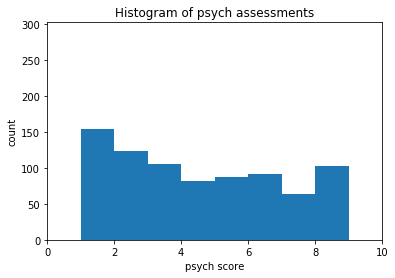

In [12]:
plt.title('Histogram of psych assessments')
plt.xlabel('psych score')
plt.ylabel('count')
plt.hist(OASIS['Psych Assessments'].fillna(-1))
plt.xlim([0,10])